## Esercitazione di Potenziamento

In [57]:
import numpy as np
import matplotlib.pyplot as plt

Implementare le function necessarie per costruire il polinomio interpolante di Lagrange. 

                                                                [5 punti]
                                                         
                                                         

In [58]:
# Funzioni per la costruzione del polinomio interpolatore nella base di
# Lagrange


def plagr(xnodi, k):
    """
    Restituisce i coefficienti del k-esimo pol di
    Lagrange associato ai punti del vettore xnodi
    """
    xzeri = np.zeros_like(xnodi)
    n = xnodi.size
    if k == 0:
        xzeri = xnodi[1:n]
    else:
        xzeri = np.append(xnodi[0:k], xnodi[k + 1 : n])

    num = np.poly(xzeri)
    den = np.polyval(num, xnodi[k])

    p = num / den

    return p


def InterpL(x, f, xx):
    """
    %funzione che determina in un insieme di punti il valore del polinomio
    %interpolante ottenuto dalla formula di Lagrange.
    % DATI INPUT
    %  x  vettore con i nodi dell'interpolazione
    %  f  vettore con i valori dei nodi
    %  xx vettore con i punti in cui si vuole calcolare il polinomio
    % DATI OUTPUT
    %  y vettore contenente i valori assunti dal polinomio interpolante
    %
    """
    n = x.size
    m = xx.size
    L = np.zeros((m, n))
    for k in range(n):
        p = plagr(x, k)
        L[:, k] = np.polyval(p, xx)
    return np.dot(L, f)

Sia assegnata la funzione $f(x)=cos(\pi x)+sin(\pi x)$, $ x \in [0,2]$

facendo uso delle functions implementate precedentemente, si determini il polinomio p che interpola f nei nodi  x0 = 1, x1 = 1.5, x2 = 1.75.

                                                               [3 punti]

In [59]:
f = lambda x : np.cos(np.pi*x) + np.sin(np.pi*x)
x = np.array([1, 1.5, 1.75])
xx = np.linspace(0,2,100)
fi = InterpL(x, f(x), xx)

si rappresenti in uno stesso grafico la funzione f, il polinomio p e i punti di interpolazione assegnati;

                                                              [2 punti]

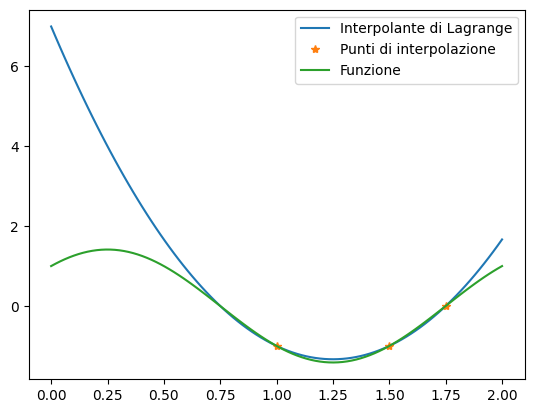

In [60]:
plt.plot(xx, fi, x, f(x), "*", xx, f(xx))
plt.legend(["Interpolante di Lagrange", "Punti di interpolazione", "Funzione"])
plt.show()

 si calcoli il valore assunto dalla funzione errore E(x) := |f(x) − p(x)| nel punto $x^∗$ = 0.75 e si definisca teoricamente da cosa dipende l'errore che si compie quando al posto del polinomio interpolatore si considera la funzione che ha generato i dati, commentando opportunamente la formula
 
                                                             [3 punti]

In [61]:
valErrore = 0.75
errore = np.abs(f(valErrore) - InterpL(x, f(x), np.array(valErrore)))
print(errore)

[2.22044605e-16]


si stabilisca qual è il polinomio interpolatore per f passante per i nodi $x^*$ 
, x0, x1 e x2.


                                                            [2 punti]

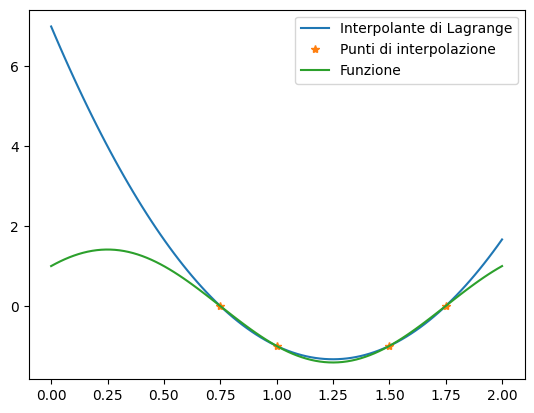

In [62]:
x1 = np.array([valErrore, 1, 1.5, 1.75])
fi1 = InterpL(x1, f(x1), xx)
plt.plot(xx, fi1, x1, f(x1), "*", xx, f(xx))
plt.legend(["Interpolante di Lagrange", "Punti di interpolazione", "Funzione"])
plt.show()

Si calcoli la costante di Lebesgue e si dica che ruolo svolge nell'ambito dell'interpolazione polinomiale

                                                             [3 punti]

In [63]:
def lebesgue(val):
    maxNorm = np.max(np.abs(val))
    sum = 0
    for i in range(val.size):
        basis = np.abs(val - val[i])
        sum += np.max(np.sum(basis))
    return sum / maxNorm

In [64]:
lebesgue(fi)

3395.5320788452095